# Importing Libs

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Importing Datasetf

In [4]:

df= pd.read_csv('/Users/harmansingh/AI Engineering/Machine Learning/Natural Language Processing/Restaurant_Reviews.tsv',delimiter='\t', quoting =3)

# Cleaning the Texts

In [6]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')
from nltk.stem.porter import PorterStemmer
corpus=[]
for i in range (0,1000):
    review = re.sub( '[^a-zA-Z]',' ', df['Review'][i] )
    review= review.lower()
    review=review.split()
    ps=PorterStemmer()
    review = [ ps.stem(word) for word in review if not word in set(all_stopwords) ]
    review = ' '.join(review)
    corpus.append(review)

print(corpus)



['wow love place', 'crust not good', 'not tasti textur nasti', 'stop late may bank holiday rick steve recommend love', 'select menu great price', 'get angri want damn pho', 'honeslti tast fresh', 'potato like rubber could tell made ahead time kept warmer', 'fri great', 'great touch', 'servic prompt', 'would not go back', 'cashier care ever say still end wayyy overpr', 'tri cape cod ravoli chicken cranberri mmmm', 'disgust pretti sure human hair', 'shock sign indic cash', 'highli recommend', 'waitress littl slow servic', 'place not worth time let alon vega', 'not like', 'burritto blah', 'food amaz', 'servic also cute', 'could care less interior beauti', 'perform', 'right red velvet cake ohhh stuff good', 'never brought salad ask', 'hole wall great mexican street taco friendli staff', 'took hour get food tabl restaur food luke warm sever run around like total overwhelm', 'worst salmon sashimi', 'also combo like burger fri beer decent deal', 'like final blow', 'found place accid could not

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/harmansingh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Creating Bag of World Model

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)
x =cv.fit_transform(corpus).toarray()
y=df.iloc[:,-1].values

# Splitting The Dataset

In [10]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

# Training Diff Models

## Naive Bayes

In [13]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train,y_train)

GaussianNB()

In [14]:
y_pred = classifier.predict(x_test)

### Confusion Matrix

In [16]:
from sklearn.metrics import confusion_matrix , accuracy_score, precision_score, f1_score, recall_score

cm= confusion_matrix( y_test, y_pred)
print(cm)
print()

NB_accuracy= accuracy_score(y_test, y_pred)*100
print('Accuracy:',NB_accuracy)
print()

NB_recall= recall_score(y_test, y_pred)*100
print("Recall:",NB_recall)
print()

NB_precision = precision_score(y_test, y_pred)*100
print('Precision:',NB_precision)
print()

NB_f1_score = f1_score(y_test,y_pred)*100
print('F1_score',NB_f1_score)

[[55 42]
 [12 91]]

Accuracy: 73.0

Recall: 88.3495145631068

Precision: 68.42105263157895

F1_score 77.11864406779662


## Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
classifier= LogisticRegression()
classifier.fit(x_train,y_train)

LogisticRegression()

In [19]:
y_pred = classifier.predict(x_test)

### Confusion Matrix

In [21]:
from sklearn.metrics import confusion_matrix , accuracy_score, precision_score, f1_score, recall_score

cm= confusion_matrix( y_test, y_pred)
print(cm)
print()

LR_accuracy= accuracy_score(y_test, y_pred)*100
print('Accuracy:',LR_accuracy)
print()

LR_recall= recall_score(y_test, y_pred)*100
print("Recall:",LR_recall)
print()

LR_precision = precision_score(y_test, y_pred)*100
print('Precision:',LR_precision)
print()

LR_f1_score = f1_score(y_test,y_pred)*100
print('F1_score',LR_f1_score)

[[80 17]
 [28 75]]

Accuracy: 77.5

Recall: 72.81553398058253

Precision: 81.52173913043478

F1_score 76.92307692307693


## Kernel Svc

In [23]:
from sklearn.svm import SVC
classifier = SVC(kernel ='rbf')
classifier.fit(x_train,y_train)

SVC()

In [24]:
y_pred =classifier.predict(x_test)

### Confusion Matrix

In [26]:
from sklearn.metrics import confusion_matrix , accuracy_score, precision_score, f1_score, recall_score

cm= confusion_matrix( y_test, y_pred)*100
print(cm)
print()

SVC_accuracy= accuracy_score(y_test, y_pred)*100
print('Accuracy:',SVC_accuracy)
print()

SVC_recall= recall_score(y_test, y_pred)*100
print("Recall:",SVC_recall)
print()

SVC_precision = precision_score(y_test, y_pred)*100
print('Precision:',SVC_precision)
print()

SVC_f1_score = f1_score(y_test,y_pred)*100
print('F1_score',SVC_f1_score)

[[8900  800]
 [3600 6700]]

Accuracy: 78.0

Recall: 65.0485436893204

Precision: 89.33333333333333

F1_score 75.2808988764045


## KNN Model

In [28]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=10,  metric = 'minkowski', p = 5)
classifier.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10, p=5)

In [29]:
y_pred=classifier.predict(x_test)

### Confusion Matrix

In [31]:
from sklearn.metrics import confusion_matrix , accuracy_score, precision_score, f1_score, recall_score

cm= confusion_matrix( y_test, y_pred)
print(cm)
print()

KNN_accuracy= accuracy_score(y_test, y_pred)*100
print('Accuracy:',KNN_accuracy)
print()

KNN_recall= recall_score(y_test, y_pred)*100
print("Recall:",KNN_recall)
print()

KNN_precision = precision_score(y_test, y_pred)*100
print('Precision:',KNN_precision)
print()

KNN_f1_score = f1_score(y_test,y_pred)*100
print('F1_score',KNN_f1_score)

[[86 11]
 [55 48]]

Accuracy: 67.0

Recall: 46.601941747572816

Precision: 81.35593220338984

F1_score 59.25925925925927


## Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion ='entropy',random_state=0)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [34]:
y_pred= classifier.predict(x_test)

### Confusion Matrix

In [36]:
from sklearn.metrics import confusion_matrix , accuracy_score, precision_score, f1_score, recall_score

cm= confusion_matrix( y_test, y_pred)*100
print(cm)
print()

T_accuracy= accuracy_score(y_test, y_pred)*100
print('Accuracy:',T_accuracy)
print()

T_recall= recall_score(y_test, y_pred)*100
print("Recall:",T_recall)
print()

T_precision = precision_score(y_test, y_pred)*100
print('Precision:',T_precision)
print()

T_f1_score = f1_score(y_test,y_pred)*100
print('F1_score',T_f1_score)

[[7800 1900]
 [3100 7200]]

Accuracy: 75.0

Recall: 69.90291262135922

Precision: 79.12087912087912

F1_score 74.22680412371135


## Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10,random_state=0)
classifier.fit(x_train,y_train)


RandomForestClassifier(n_estimators=10, random_state=0)

In [39]:
y_pred= classifier.predict(x_test)

### Confusion Matrix

In [41]:
from sklearn.metrics import confusion_matrix , accuracy_score, precision_score, f1_score, recall_score

cm= confusion_matrix( y_test, y_pred)
print(cm)
print()

RF_accuracy= accuracy_score(y_test, y_pred)*100
print('Accuracy:',RF_accuracy)
print()

RF_recall= recall_score(y_test, y_pred)*100
print("Recall:",RF_recall)
print()

RF_precision = precision_score(y_test, y_pred)*100
print('Precision:',RF_precision)
print()

RF_f1_score = f1_score(y_test,y_pred)*100
print('F1_score',RF_f1_score)

[[84 13]
 [44 59]]

Accuracy: 71.5

Recall: 57.28155339805825

Precision: 81.94444444444444

F1_score 67.42857142857143


# Heat Map

In [43]:
print(LR_accuracy, LR_precision, LR_recall, LR_f1_score)
print(RF_accuracy, RF_precision, RF_recall, RF_f1_score)
print(SVC_accuracy, SVC_precision, SVC_recall, SVC_f1_score)
print(NB_accuracy, NB_precision, NB_recall, NB_f1_score)
print(KNN_accuracy, KNN_precision, KNN_recall, KNN_f1_score)

77.5 81.52173913043478 72.81553398058253 76.92307692307693
71.5 81.94444444444444 57.28155339805825 67.42857142857143
78.0 89.33333333333333 65.0485436893204 75.2808988764045
73.0 68.42105263157895 88.3495145631068 77.11864406779662
67.0 81.35593220338984 46.601941747572816 59.25925925925927


In [79]:
print(df)

           Logistic Regression  Random Forest  Kernel SVM - RBF  Naive Bayes  \
Metric                                                                         
Accuracy             77.500000      71.500000         78.000000    73.000000   
Precision            81.521739      81.944444         89.333333    68.421053   
Recall               72.815534      57.281553         65.048544    88.349515   
F1-Score             76.923077      67.428571         75.280899    77.118644   

                 KNN  
Metric                
Accuracy   67.000000  
Precision  81.355932  
Recall     46.601942  
F1-Score   59.259259  


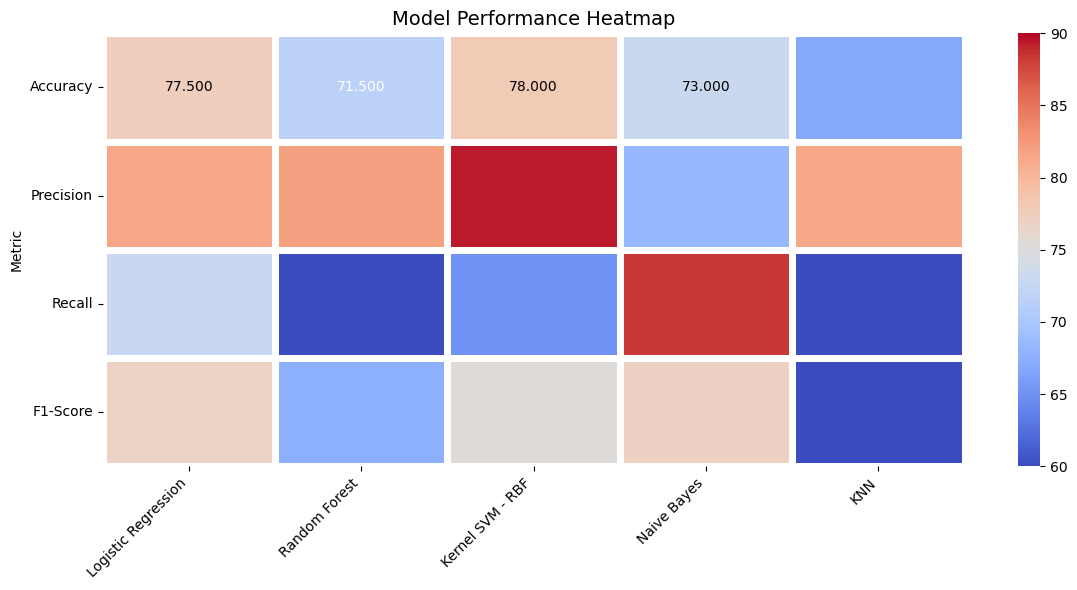

In [89]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Create a DataFrame with the metrics
data = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Logistic Regression': [LR_accuracy, LR_precision, LR_recall, LR_f1_score],
    'Random Forest': [RF_accuracy, RF_precision, RF_recall, RF_f1_score],
    'Kernel SVM - RBF': [SVC_accuracy, SVC_precision, SVC_recall, SVC_f1_score],
    'Naive Bayes': [NB_accuracy, NB_precision, NB_recall, NB_f1_score],
    'KNN': [KNN_accuracy, KNN_precision, KNN_recall, KNN_f1_score]
}

df = pd.DataFrame(data)
df.set_index('Metric', inplace=True)

# Step 2: Plotting the heatmap

# Set figure size properly
plt.figure(figsize=(12, 6))


# Create the heatmap
ax = sns.heatmap(df, annot=True, fmt=".3f", cmap='coolwarm', vmin=60, vmax=90,
                 linewidths=5, cbar=True, annot_kws={"fontsize": 10})

# Dynamically adjust text color based on cell background
for text in ax.texts:
    try:
        val = float(text.get_text())
        text.set_color('white' if val < 72 else 'black')
    except:
        text.set_color('black')

# Final touches
plt.title("Model Performance Heatmap", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()